<a href="https://colab.research.google.com/github/afif-af/machine_learning_project/blob/main/ProjectBreastCancerPredictionusingPyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [7]:
# from google.colab import files
# uploaded=files.upload()

In [8]:
df=pd.read_csv('BRCA Data.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [9]:
df.isnull().sum()

,0
Patient_ID,7
Age,7
Gender,7
Protein1,7
Protein2,7
Protein3,7
Protein4,7
Tumour_Stage,7
Histology,7
ER status,7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [11]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [12]:
df.isnull()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
337,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
338,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
339,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [13]:
df.shape

(341, 16)

In [14]:
df.dropna(inplace=True)

In [15]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [16]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0


In [17]:
df.shape

(317, 16)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [19]:
df.Gender.value_counts() #highly imbalanced data

,count
Gender,
FEMALE,313
MALE,4


In [20]:
print('Patient status is 100%')
round(df.Patient_Status.value_counts()*100/len(df),1)

Patient status is 100%


,count
Patient_Status,
Alive,80.4
Dead,19.6


Visulization

In [21]:
Patient_Status=df['Patient_Status'].value_counts()
transactions=Patient_Status.index
quantity=Patient_Status.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='Patient Status')
figure.show()

In [22]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [23]:
stage=df['Tumour_Stage'].value_counts()
transactions=stage.index
quantity=stage.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='Tumour state of patient')
figure.show()

In [24]:
stage=df['Histology'].value_counts()
transactions=stage.index
quantity=stage.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='Histology of patient')
figure.show()

In [25]:
ER_status=df['ER status'].value_counts()
transactions=ER_status.index
quantity=ER_status.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='ER status')
figure.show()

In [26]:
PR_status=df['PR status'].value_counts()
transactions=PR_status.index
quantity=ER_status.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='PR status')
figure.show()

In [27]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [28]:
HER2_status=df['HER2 status'].value_counts()
transactions=HER2_status.index
quantity=HER2_status.values

figure=px.pie(df,
              values=quantity,
              names=transactions, hole=.60,
              title='HER2 status')
figure.show()

In [29]:
df.drop(['Patient_ID','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [30]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [31]:
df.Gender.value_counts()

,count
Gender,
FEMALE,313
MALE,4


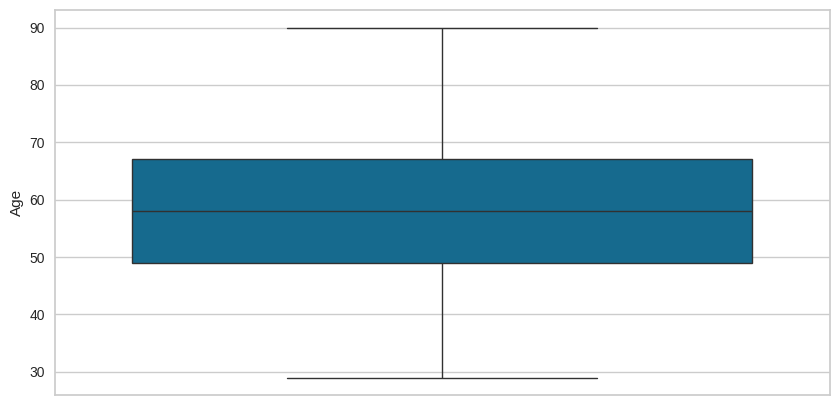

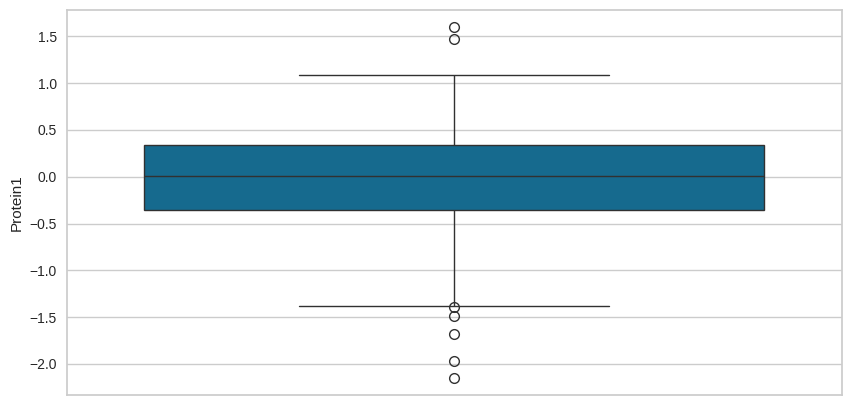

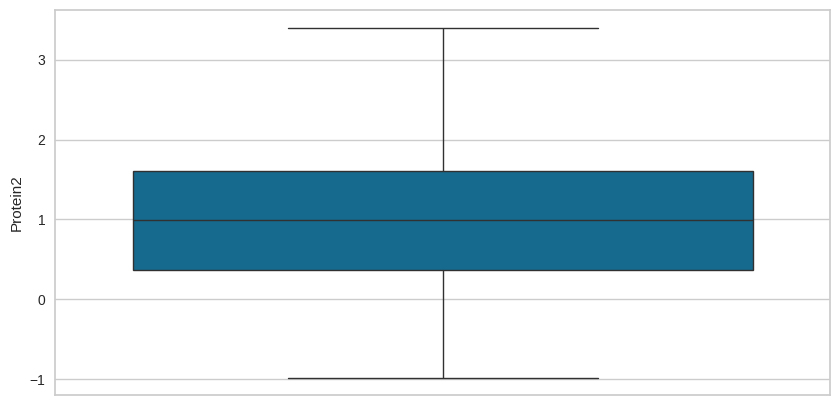

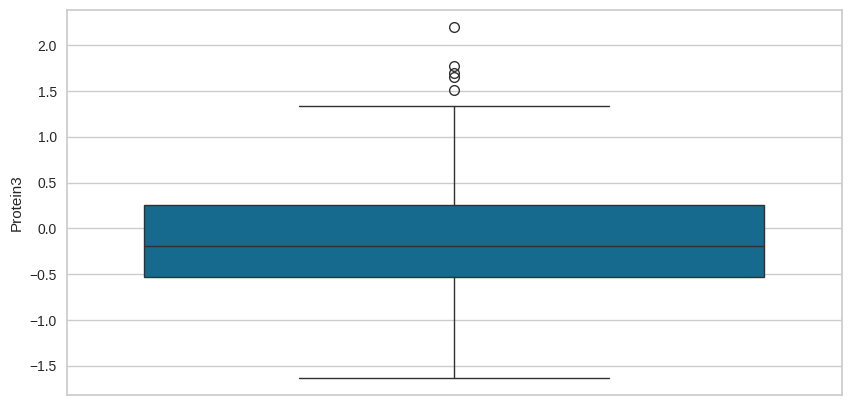

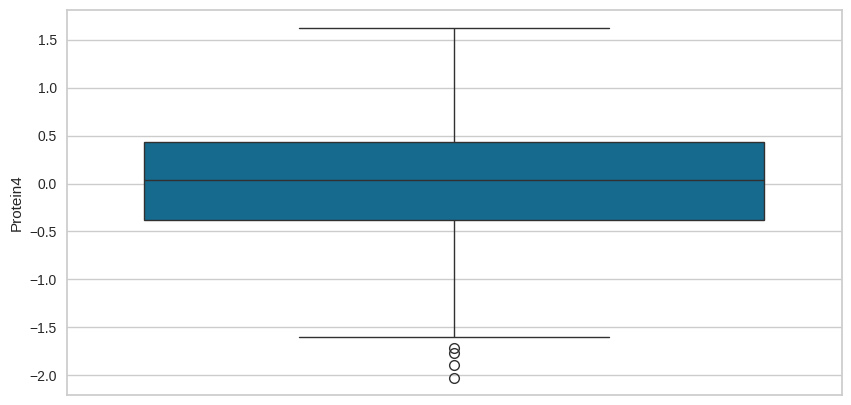

In [32]:
for i in ['Age','Protein1','Protein2','Protein3','Protein4']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.show()

In [33]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# ProfileReport(df, title="EDA Report of Breast Cancer Dataset")

In [34]:
from pycaret.classification import setup
from pycaret.classification import *

In [35]:
import mlflow

In [36]:
cancer=setup(data=df,
    target='Patient_Status',
    normalize=True,
    log_experiment=False,  # Disable experiment logging to avoid mlflow issue
    remove_multicollinearity=True,
    numeric_imputation='median',
    fold=5,
    train_size=0.70
             )

,Description,Value
0,Session id,427
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 11)"
5,Transformed data shape,"(317, 18)"
6,Transformed train set shape,"(221, 18)"
7,Transformed test set shape,"(96, 18)"
8,Numeric features,5
9,Categorical features,5


In [37]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.4136,0.7778,0.6364,0.7000,-0.0417,-0.0754
1,0.8182,0.4132,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.8182,0.4965,0.8182,0.6694,0.7364,0.0000,0.0000
3,0.7727,0.4381,0.7727,0.6290,0.6935,-0.0427,-0.0773
4,0.7955,0.5762,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.7965,0.4675,0.7965,0.6474,0.7142,-0.0169,-0.0305
Std,0.0193,0.0623,0.0193,0.0181,0.0184,0.0207,0.0374


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [39]:
get_config('X_test')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
78,56.0,FEMALE,-0.257500,0.80691,-0.509170,-0.034585,I,Infiltrating Ductal Carcinoma,Negative,Other
143,69.0,FEMALE,0.299390,-0.30765,1.071600,-0.179500,II,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy
36,49.0,FEMALE,0.061643,1.31490,-0.099357,0.754410,II,Infiltrating Lobular Carcinoma,Negative,Other
225,47.0,FEMALE,0.294880,1.40370,0.244300,-0.395880,III,Infiltrating Lobular Carcinoma,Positive,Lumpectomy
30,61.0,FEMALE,-0.227880,1.79080,-0.756210,0.739770,I,Infiltrating Ductal Carcinoma,Negative,Other
...,...,...,...,...,...,...,...,...,...,...
75,65.0,FEMALE,0.435530,0.77034,0.493680,0.374320,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
233,51.0,FEMALE,0.572410,2.00890,-1.182500,0.290320,II,Infiltrating Lobular Carcinoma,Negative,Other
229,64.0,FEMALE,-0.344570,0.79012,-0.468870,-0.455570,I,Infiltrating Lobular Carcinoma,Negative,Lumpectomy
91,68.0,FEMALE,-0.260000,0.86044,0.076732,0.186700,II,Infiltrating Lobular Carcinoma,Negative,Other


In [40]:
get_config('X_test_transformed')

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_II,Tumour_Stage_III,Tumour_Stage_I,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status,Surgery_type_Lumpectomy,Surgery_type_Simple Mastectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other
78,-0.210256,-0.135769,-0.431568,-0.138026,-0.765278,-0.099885,-1.162353,-0.540738,2.005674,0.638470,-0.575609,-0.206041,-0.288675,-0.498586,-0.526742,-0.645497,1.566246
143,0.793174,-0.135769,0.576793,-1.379562,2.022532,-0.337279,0.860324,-0.540738,-0.498586,0.638470,-0.575609,-0.206041,-0.288675,-0.498586,1.898464,-0.645497,-0.638470
36,-0.750564,-0.135769,0.146305,0.427837,-0.042541,1.192613,0.860324,-0.540738,-0.498586,-1.566246,1.737292,-0.206041,-0.288675,-0.498586,-0.526742,-0.645497,1.566246
225,-0.904937,-0.135769,0.568627,0.526753,0.563524,-0.691743,-1.162353,1.849324,-0.498586,-1.566246,1.737292,-0.206041,3.464102,2.005674,-0.526742,-0.645497,-0.638470
30,0.175679,-0.135769,-0.377935,0.957954,-1.200953,1.168631,-1.162353,-0.540738,2.005674,0.638470,-0.575609,-0.206041,-0.288675,-0.498586,-0.526742,-0.645497,1.566246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.484426,-0.135769,0.823302,-0.178762,1.003326,0.569966,-1.162353,1.849324,-0.498586,0.638470,-0.575609,-0.206041,-0.288675,-0.498586,-0.526742,1.549193,-0.638470
233,-0.596190,-0.135769,1.071150,1.200901,-1.952748,0.432361,0.860324,-0.540738,-0.498586,-1.566246,1.737292,-0.206041,-0.288675,-0.498586,-0.526742,-0.645497,1.566246
229,0.407239,-0.135769,-0.589225,-0.156729,-0.694206,-0.789525,-1.162353,-0.540738,2.005674,-1.566246,1.737292,-0.206041,-0.288675,2.005674,-0.526742,-0.645497,-0.638470
91,0.715987,-0.135769,-0.436094,-0.078397,0.268005,0.262615,0.860324,-0.540738,-0.498586,-1.566246,1.737292,-0.206041,-0.288675,-0.498586,-0.526742,-0.645497,1.566246


In [41]:
get_config('target_param')

'Patient_Status'

In [42]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8055,0.5000,0.8055,0.6489,0.7187,0.0000,0.0000,0.1320
ridge,Ridge Classifier,0.8009,0.5524,0.8009,0.6481,0.7164,-0.0085,-0.0155,0.1580
rf,Random Forest Classifier,0.7965,0.4675,0.7965,0.6474,0.7142,-0.0169,-0.0305,0.3360
gbc,Gradient Boosting Classifier,0.7920,0.5297,0.7920,0.7059,0.7320,0.0493,0.0637,0.6300
xgboost,Extreme Gradient Boosting,0.7827,0.5154,0.7827,0.6777,0.7191,0.0058,0.0017,0.1980
lr,Logistic Regression,0.7785,0.5574,0.7785,0.6444,0.7050,-0.0477,-0.0720,0.2860
lda,Linear Discriminant Analysis,0.7785,0.5518,0.7785,0.6444,0.7050,-0.0477,-0.0720,0.2340
lightgbm,Light Gradient Boosting Machine,0.7736,0.4771,0.7736,0.6814,0.7153,-0.0048,-0.0011,0.2640
et,Extra Trees Classifier,0.7556,0.4729,0.7556,0.6406,0.6931,-0.0829,-0.1084,0.3560
knn,K Neighbors Classifier,0.7376,0.5241,0.7376,0.6499,0.6893,-0.0868,-0.1014,0.1440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=427, strategy='prior')

In [43]:
catb=create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.5123,0.8000,0.6400,0.7111,0.0000,0.0000
1,0.8182,0.5764,0.8182,0.6694,0.7364,0.0000,0.0000
2,0.8182,0.4826,0.8182,0.6694,0.7364,0.0000,0.0000
3,0.7727,0.6095,0.7727,0.6290,0.6935,-0.0427,-0.0773
4,0.7955,0.5810,0.7955,0.6327,0.7048,0.0000,0.0000
Mean,0.8009,0.5524,0.8009,0.6481,0.7164,-0.0085,-0.0155
Std,0.0169,0.0472,0.0169,0.0178,0.0172,0.0171,0.0309


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
evaluate_model(catb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [45]:
unseen_predictions=predict_model(rf, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9401,0.9291,0.9401,0.9442,0.9357,0.7845,0.8034


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.93
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,0.69
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,0.91
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,0.97
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,0.80


In [46]:
save_model(rf, 'rf_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max

In [48]:
from pickle import load
from pycaret.classification import load_model
load_model('rf_model')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Protein1', 'Protein2',
                                             'Protein3', 'Protein4'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_e...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=427, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [55]:
# from IPython.display import Image
# Image(filename='rf_model.png')


In [57]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_resampled,y_resampled=ros.fit_resample(df.drop('Patient_Status',axis=1),df['Patient_Status'])

In [58]:
x_resampled.shape,y_resampled.shape

((510, 10), (510,))

In [59]:
x_resampled.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [60]:
df2=pd.concat([x_resampled,y_resampled],axis=1)

In [61]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [62]:
cancer=setup(data=df2,
    target='Patient_Status',
    normalize=True,
    log_experiment=False,  # Disable experiment logging to avoid mlflow issue
    remove_multicollinearity=True,
    numeric_imputation='median',
    fold=5,
    train_size=0.70
             )

,Description,Value
0,Session id,6236
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 11)"
5,Transformed data shape,"(510, 18)"
6,Transformed train set shape,"(357, 18)"
7,Transformed test set shape,"(153, 18)"
8,Numeric features,5
9,Categorical features,5


In [63]:
rf2=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9753,0.9583,0.9587,0.9583,0.9167,0.9170
1,0.8889,0.9811,0.8889,0.8938,0.8885,0.7778,0.7826
2,0.9437,0.9905,0.9437,0.9450,0.9436,0.8872,0.8886
3,0.9577,0.9683,0.9577,0.9581,0.9577,0.9155,0.9159
4,0.9296,0.9734,0.9296,0.9327,0.9295,0.8593,0.8624
Mean,0.9356,0.9777,0.9356,0.9377,0.9355,0.8713,0.8733
Std,0.0257,0.0076,0.0257,0.0239,0.0258,0.0513,0.0496


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9385,0.9819,0.9385,0.9421,0.9383,0.8770,0.8806,0.5040
rf,Random Forest Classifier,0.9356,0.9777,0.9356,0.9377,0.9355,0.8713,0.8733,0.5860
xgboost,Extreme Gradient Boosting,0.8654,0.9504,0.8654,0.8783,0.8642,0.7307,0.7435,0.3180
lightgbm,Light Gradient Boosting Machine,0.8572,0.9313,0.8572,0.8742,0.8554,0.7143,0.7310,0.9740
gbc,Gradient Boosting Classifier,0.8458,0.9195,0.8458,0.8606,0.8436,0.6913,0.7059,0.8420
dt,Decision Tree Classifier,0.8376,0.8381,0.8376,0.8567,0.8353,0.6756,0.6942,0.1840
ada,Ada Boost Classifier,0.7032,0.7682,0.7032,0.7151,0.6980,0.4062,0.4179,0.4080
knn,K Neighbors Classifier,0.6669,0.7256,0.6669,0.6739,0.6629,0.3337,0.3406,0.2020
qda,Quadratic Discriminant Analysis,0.5825,0.6157,0.5825,0.5849,0.5724,0.1627,0.1662,0.2440
lr,Logistic Regression,0.5577,0.5790,0.5577,0.5592,0.5557,0.1153,0.1168,0.2300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6236, verbose=0,
                     warm_start=False)

In [65]:
et=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9722,0.9167,0.9219,0.9164,0.8333,0.8385
1,0.9306,0.9938,0.9306,0.9390,0.9302,0.8611,0.8695
2,0.9296,0.9889,0.9296,0.9327,0.9295,0.8593,0.8624
3,0.9437,0.9718,0.9437,0.9451,0.9436,0.8874,0.8888
4,0.9718,0.9829,0.9718,0.9718,0.9718,0.9437,0.9437
Mean,0.9385,0.9819,0.9385,0.9421,0.9383,0.8770,0.8806
Std,0.0187,0.0088,0.0187,0.0167,0.0188,0.0375,0.0354


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

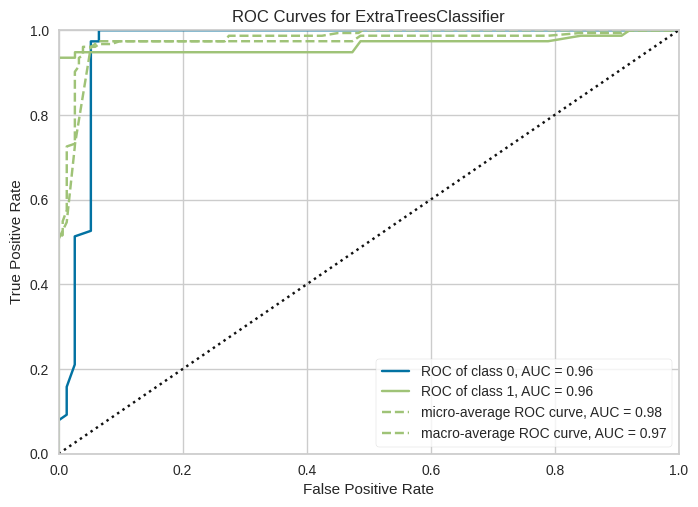

In [67]:
plot_model(et, plot='auc')

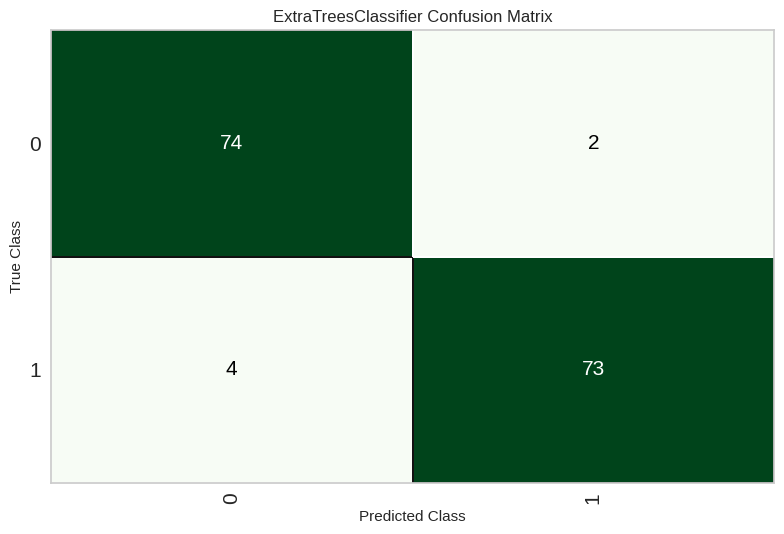

In [68]:
plot_model(et, plot='confusion_matrix')

In [69]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [70]:
save_model(et, 'et_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_feat

In [71]:
load_model('et_model')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Protein1', 'Protein2',
                                             'Protein3', 'Protein4'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_e...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=6236, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [72]:
unseen_predictions=predict_model(et, data=df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9842,0.9892,0.9842,0.9842,0.9842,0.9496,0.9496


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.00
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead,Dead,1.00
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive,Alive,0.78
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive,Alive,1.00
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,Dead,1.00
